In [1]:
import load_data 
import network 
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
%matplotlib inline

In [2]:
path = './data/'
filename = 'dataset_batch_3.mat'
train_input_dataset,train_output_dataset = load_data.load_dataset(path,filename)
print(train_input_dataset.shape,train_output_dataset.shape)

(1189, 200, 128, 128) (1189, 128, 128)


In [3]:
path = './data/'
filename = 'dataset_batch_2.mat'
test_input_dataset,test_output_dataset = load_data.load_dataset(path,filename)
print(test_input_dataset.shape,test_output_dataset.shape)
testing_dataset = load_data.DeconvolutionDataset(test_input_dataset,test_output_dataset,transform=load_data.ToTensor())

(528, 200, 128, 128) (528, 128, 128)


In [4]:
training_dataset = load_data.DeconvolutionDataset(train_input_dataset,train_output_dataset,transform=load_data.ToTensor())
dataloader = DataLoader(training_dataset, batch_size=80,shuffle=True, num_workers=4)

In [5]:
device = torch.device("cuda:0")
model = network.FullyConvNet_1()
# model = nn.DataParallel(model)
# model.cuda()
model.to(device)

# criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# optimizer = optim.SGD(model.parameters(), lr=1e-9)
optimizer = optim.Adam(model.parameters(), lr=1e-7)

In [6]:
num_epochs = 100000
for epoch in range(num_epochs):
    for batch_idx, sample in enumerate(dataloader):
        inputs,target = sample['input'].to(device),sample['output'].to(device)
#         inputs,target = sample['input'].cuda(),sample['output'].cuda()
        
#         inputs = Variable(x_train).cuda()
#         target = Variable(y_train).cuda()

        # forward
        out = model(inputs)
        loss = criterion(out, target)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch < 100:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))
    elif (epoch+1) % 100 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))


/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:20: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[1/100000], loss: 2.611315
Epoch[2/100000], loss: 2.472488
Epoch[3/100000], loss: 1.850000
Epoch[4/100000], loss: 1.555218
Epoch[5/100000], loss: 1.096540
Epoch[6/100000], loss: 0.719206
Epoch[7/100000], loss: 0.488369
Epoch[8/100000], loss: 0.301018
Epoch[9/100000], loss: 0.252575
Epoch[10/100000], loss: 0.274706
Epoch[11/100000], loss: 0.279816
Epoch[12/100000], loss: 0.256510
Epoch[13/100000], loss: 0.266833
Epoch[14/100000], loss: 0.268424
Epoch[15/100000], loss: 0.256328
Epoch[16/100000], loss: 0.266743
Epoch[17/100000], loss: 0.241187
Epoch[18/100000], loss: 0.272830
Epoch[19/100000], loss: 0.258571
Epoch[20/100000], loss: 0.249742
Epoch[21/100000], loss: 0.251290
Epoch[22/100000], loss: 0.255690
Epoch[23/100000], loss: 0.235741
Epoch[24/100000], loss: 0.221151
Epoch[25/100000], loss: 0.230590
Epoch[26/100000], loss: 0.221829
Epoch[27/100000], loss: 0.234150
Epoch[28/100000], loss: 0.218394
Epoch[29/100000], loss: 0.223327
Epoch[30/100000], loss: 0.230474
Epoch[31/100000], l

/home/weixin/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch[200/100000], loss: 0.111461
Epoch[300/100000], loss: 0.080151
Epoch[400/100000], loss: 0.078423
Epoch[500/100000], loss: 0.048229
Epoch[600/100000], loss: 0.022416
Epoch[700/100000], loss: 0.019012
Epoch[800/100000], loss: 0.014743
Epoch[900/100000], loss: 0.011649
Epoch[1000/100000], loss: 0.009361
Epoch[1100/100000], loss: 0.007792
Epoch[1200/100000], loss: 0.007045
Epoch[1300/100000], loss: 0.006945
Epoch[1400/100000], loss: 0.006236
Epoch[1500/100000], loss: 0.005588
Epoch[1600/100000], loss: 0.004907
Epoch[1700/100000], loss: 0.004927
Epoch[1800/100000], loss: 0.004074
Epoch[1900/100000], loss: 0.003987
Epoch[2000/100000], loss: 0.003968
Epoch[2100/100000], loss: 0.003817
Epoch[2200/100000], loss: 0.003616
Epoch[2300/100000], loss: 0.003116
Epoch[2400/100000], loss: 0.003075
Epoch[2500/100000], loss: 0.002957
Epoch[2600/100000], loss: 0.002624
Epoch[2700/100000], loss: 0.002519
Epoch[2800/100000], loss: 0.002432
Epoch[2900/100000], loss: 0.002442
Epoch[3000/100000], loss: 0.

Process Process-39069:
Traceback (most recent call last):
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/weixin/anaconda3/lib/python3.5/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/weixin/anaconda3/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [7]:
model.eval()

FullyConvNet_1(
  (conv1): Conv2d(200, 100, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(100, 50, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv3): Conv2d(50, 10, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv4): Conv2d(10, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
)

In [8]:
print(len(training_dataset),len(testing_dataset))
print(training_dataset)

1189 528


In [9]:
train_data = np.asarray(np.transpose(train_input_dataset[:100,:,:,:],(0,1,2,3)),dtype=np.float32)
train_data = torch.from_numpy(train_data)
predict = model(train_data.to(device))
predict_train = predict.data.cpu().numpy()

In [10]:
print(predict_train.shape)

(100, 1, 128, 128)


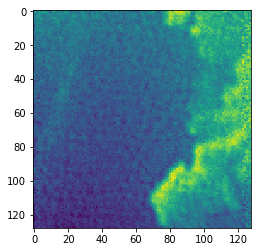

In [11]:
plt.imshow(predict_train[20,0,:,:])

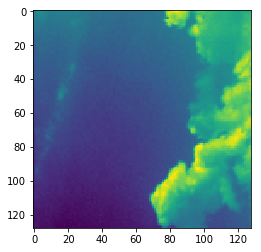

In [12]:
plt.imshow(train_output_dataset[20,:,:])

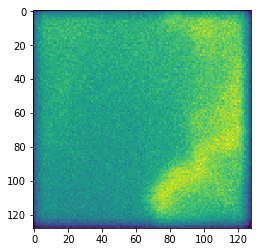

In [13]:
plt.imshow(train_input_dataset[20,190,:,:])

In [14]:
test_data = np.asarray(np.transpose(test_input_dataset[:100,:,:,:],(0,1,2,3)),dtype=np.float32)
test_data = torch.from_numpy(test_data)
predict = model(test_data.to(device))
predict_test = predict.data.cpu().numpy()
print(predict_test.shape)

(100, 1, 128, 128)


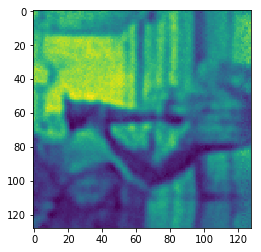

In [17]:
plt.imshow(predict_test[70,0,:,:])

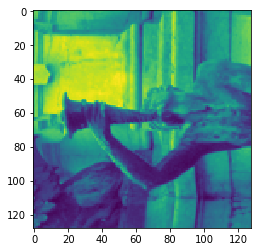

In [18]:
plt.imshow(test_output_dataset[70,:,:])

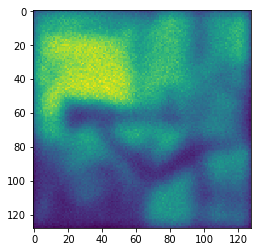

In [19]:
plt.imshow(test_input_dataset[70,190,:,:])

In [1]:
import cv2 as cv
import numpy as np

In [2]:
"""
Video Quality Metrics
Copyright (c) 2014 Alex Izvorski <aizvorski@gmail.com>

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.
"""

import numpy
import math

def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [41]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
filepath = './result/'
test_gt = np.asarray(cv.imread(os.path.join(filepath,'test_3.png'),0))
test_predict = np.asarray(cv.imread(os.path.join(filepath,'test_3.png'),0))

(256, 256)

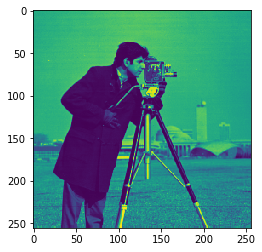

In [42]:
plt.imshow(test_gt)
test_gt.shape

(256, 256)

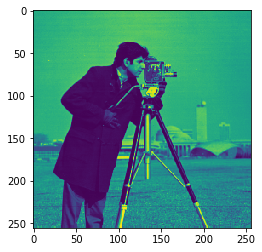

In [43]:
plt.imshow(test_predict)
test_predict.shape

In [44]:
psnr(test_gt,test_predict)

100

In [46]:
cv.imwrite(os.path.join(filepath,'test_save.png'),test_gt)

True

In [47]:
test_tmp = cv.imread(os.path.join(filepath,'test_save.png'),0)

In [48]:
psnr(test_gt,test_tmp)

100

In [50]:
save_path = './result/test/'
import os
if not os.path.exists(save_path):
    os.makedirs(save_path)

In [52]:
my_data = np.random.rand(4)
my_data.shape = (4)
my_data.shape

(4,)

In [57]:
save_data = []
save_data.append(np.random.rand(4))
save_data.append(np.random.rand(4))
save_data.append(np.random.rand(4))
save_data

[array([ 0.9878131 ,  0.20443486,  0.42042626,  0.98377117]),
 array([ 0.18071874,  0.61587014,  0.76654372,  0.6509883 ]),
 array([ 0.13582796,  0.12682958,  0.8037126 ,  0.64721993])]

In [61]:
import csv
save_filename = 'test.csv'
myfile = open(os.path.join(save_path,save_filename),'w+')
with myfile:
    writer = csv.writer(myfile)
    writer.writerows(save_data)
myfile.close()

In [67]:
myfile = open(os.path.join(save_path,save_filename),'r')
mydata = []
with myfile:
    data = csv.reader(myfile)
    for row in data:
        mydata.append(row)
myfile.close()

In [68]:
print(mydata)

[['0.987813100076', '0.204434859831', '0.420426255473', '0.983771172335'], ['0.180718744282', '0.615870138142', '0.766543722384', '0.650988296148'], ['0.13582795607', '0.126829582515', '0.803712603319', '0.647219933752']]


In [73]:
np.asarray(mydata)[1,1]

'0.615870138142'

In [74]:
import csv
save_filename = 'test.csv'
myfile = open(os.path.join(save_path,save_filename),'a')
with myfile:
    writer = csv.writer(myfile)
    writer.writerow(np.ones(4))
myfile.close()

In [75]:
myfile = open(os.path.join(save_path,save_filename),'r')
mydata = []
with myfile:
    data = csv.reader(myfile)
    for row in data:
        mydata.append(row)
myfile.close()

In [76]:
print(mydata)

[['0.987813100076', '0.204434859831', '0.420426255473', '0.983771172335'], ['0.180718744282', '0.615870138142', '0.766543722384', '0.650988296148'], ['0.13582795607', '0.126829582515', '0.803712603319', '0.647219933752'], ['1.0', '1.0', '1.0', '1.0']]
